# KNN From Scratch (using Iris dataset)

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## importing dataset

In [2]:
df = pd.read_csv("data/iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [29]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## KNN Classifier From Scratch

In [6]:
class KNN:
    def __init__(self, k: int = 3) -> None:
        self.k = k

    def fit(self, X, y) -> None:
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2) -> int | float:
        return np.sqrt(np.sum((x1-x2)**2))

    def predict(self, X) -> np.ndarray:
        predict_y = [self._predict(x) for x in X]
        return np.array(predict_y)

    def _predict(self, x) -> np.intp:
        # dist
        distances = [self.euclidean_distance(
            x, x_train) for x_train in self.X_train]
        # sorting and indices
        k_indices = np.argsort(distances)[:self.k]
        # get lables/class
        k_labels = [self.y_train[i] for i in k_indices]
        # get most common lables
        most_common = np.bincount(k_labels).argmax()
        return most_common

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1]
Accuracy: 98.33%


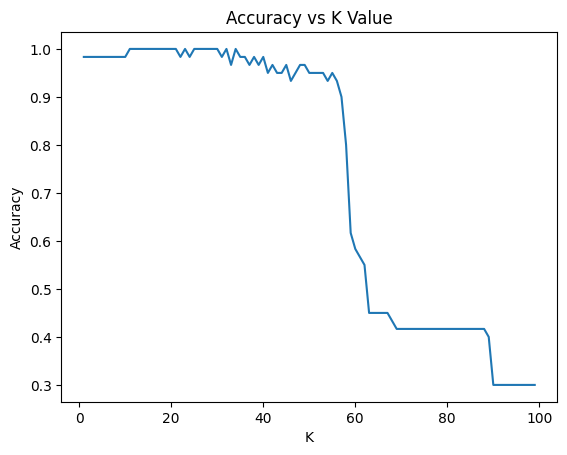

In [26]:
def main() -> None:
    # input and output features
    input_features = df[['SepalLengthCm', 'SepalWidthCm',
                         'PetalLengthCm', 'PetalWidthCm']].values
    label_map_to_int = {'Iris-setosa': 0,
                        'Iris-versicolor': 1, 'Iris-virginica': 2}
    output_feature = df['Species'].map(label_map_to_int).values
    
    # data split
    input_train, input_test, output_train, output_test = train_test_split(
        input_features, output_feature, test_size=0.4, random_state=42
    )
    # training
    knn = KNN(k=3)
    knn.fit(input_train,output_train)
    predictions = knn.predict(input_test)
    print(predictions)
    
    # accuracy
    accuracy = accuracy_score(output_test, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    k_values = range(1, 100)
    accuracies = []

    for k in k_values:
        knn = KNN(k=k)
        knn.fit(input_train, output_train)
        preds = knn.predict(input_test)
        accuracies.append(accuracy_score(output_test, preds))

    plt.plot(k_values, accuracies)
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs K Value')
    plt.show()


if __name__ == '__main__':
    main()